In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df.drop(columns='Outcome')
Y = df['Outcome']
#seperating data and label
Y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X_train, X_test,  Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)



#Feeding training data to our model

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [19]:
knn.predict(X_test)


array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [20]:
knn.score(X_test, Y_test)

0.6623376623376623

##Solving the problems of Overfitting and Underfitting

In [34]:
training_accuracy = {}
testing_accuracy = {}

neighbors  = np.arange(1,50)

for neighbour in neighbors :
  knn = KNeighborsClassifier(n_neighbors = neighbour)
  knn.fit(X_train, Y_train)
  training_accuracy[neighbour] = knn.score(X_train, Y_train)
  testing_accuracy[neighbour] = knn.score(X_test, Y_test)




#Visualising the N variation with the model with testing and training data.

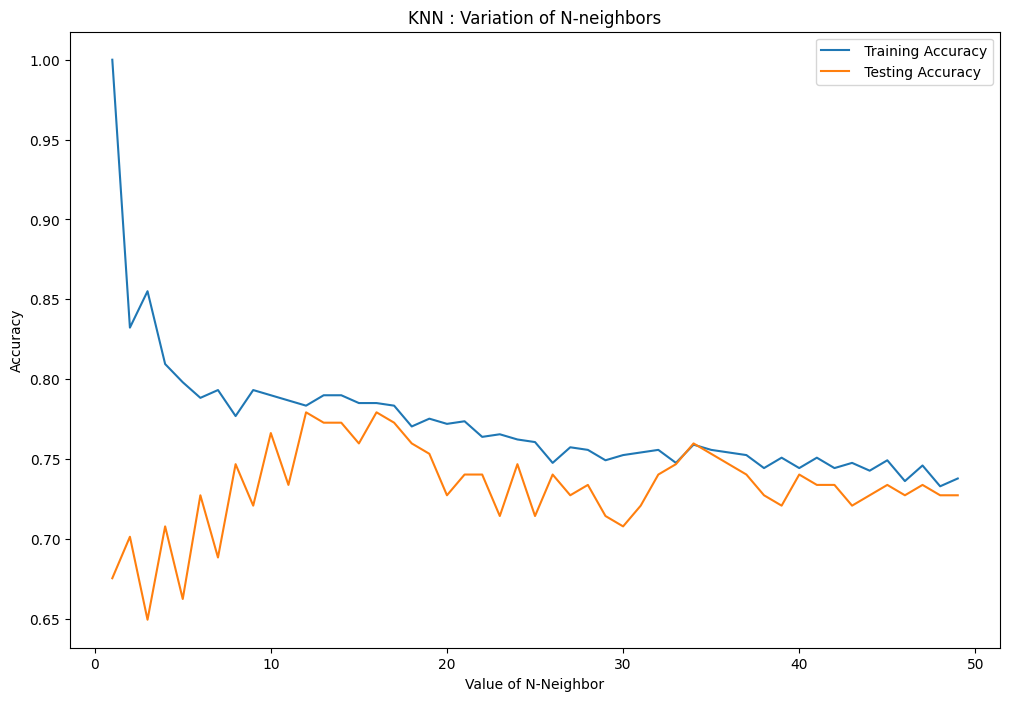

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.title("KNN : Variation of N-neighbors")
plt.plot(neighbors, training_accuracy.values(), label = " Training Accuracy")
plt.plot(neighbors, testing_accuracy.values(), label = " Testing Accuracy")
plt.legend()
plt.xlabel("Value of N-Neighbor")
plt.ylabel("Accuracy")
plt.show()



In [37]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, Y_train)



KNeighborsClassifier(n_neighbors=12)

In [39]:
score = knn.score(X_test, Y_test)
score

0.7792207792207793

Thus we checked what N will give the best accuracy for our data and model, and we get accuracy of 77.9%.
